**Directions: ** Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the questions below.


In this dataset, the same participants answered questions in 2012 and again 2014.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats

In [3]:
path = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Survey responders in Spain did lose trust between 2012 and 2014, and the amount of loss was statistically significant according to the p-value that came out of the t-test for paired samples. Sweden's change between 2012 and 2014 was also statistically significant; however, the amount of trust there increased. The changes in the other four countries were not found to be statistically significant.

In [5]:
df["cntry"].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

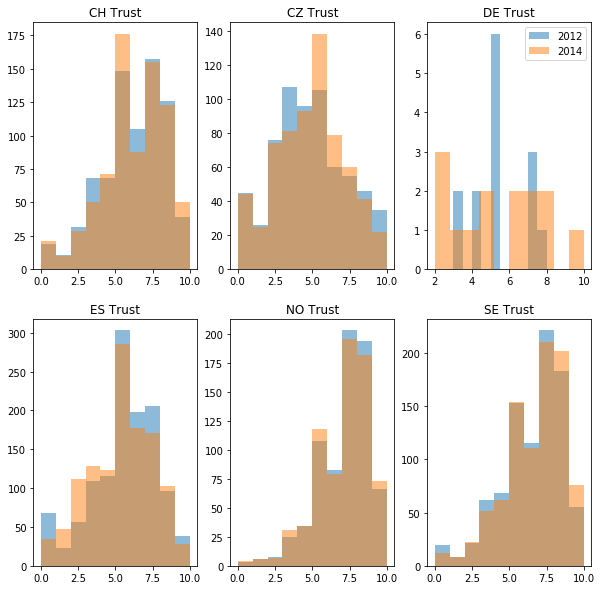

In [6]:
plt.subplots(2, 3, figsize=(10,10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

figs = [ax1, ax2, ax3, ax4, ax5, ax6]

cntry = df["cntry"].unique()

for f, c in zip(figs, cntry):
    f.hist(df[(df["cntry"] == c) & (df["year"] == 6)]["ppltrst"].dropna(), alpha=.5, label="2012")
    f.hist(df[(df["cntry"] == c) & (df["year"] == 7)]["ppltrst"].dropna(), alpha=.5, label="2014")
    f.set_title(c + " Trust")

ax3.legend()

In [7]:
### because all the variables seem normally distributed, I will use the t-test for paired samples
print("Comparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[0])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[1])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[2])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[3])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[4])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[5])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

Comparing 2012/2014 Levels of Trust in  CH
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

Comparing 2012/2014 Levels of Trust in  CZ
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

Comparing 2012/2014 Levels of Trust in  DE
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Comparing 2012/2014 Levels of Trust in  ES
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)

Comparing 2012/2014 Levels of Trust in  NO
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

Comparing 2012/2014 Levels of Trust in  SE
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


In [8]:
import statistics
print("Sweden's average trust in 2012:", statistics.mean(df[(df["cntry"] == "SE") & (df["year"] == 6)]["ppltrst"].dropna()))
print("Sweden's average trust in 2014:", statistics.mean(df[(df["cntry"] == "SE") & (df["year"] == 7)]["ppltrst"].dropna()))
print("\nSpain's average trust in 2012:", statistics.mean(df[(df["cntry"] == "ES") & (df["year"] == 6)]["ppltrst"].dropna()))
print("Spain's average trust in 2014:", statistics.mean(df[(df["cntry"] == "ES") & (df["year"] == 7)]["ppltrst"].dropna()))


Sweden's average trust in 2012: 6.058498896247241
Sweden's average trust in 2014: 6.257709251101321

Spain's average trust in 2012: 5.114591920857379
Spain's average trust in 2014: 4.895127993393889


### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Survey responders in the Czech Republic did gain happiness between 2012 and 2014, and the amount of loss was statistically significant according to the p-value that came out of the Wilcoxon signed-rank test. Norway's change between 2012 and 2014 was also statistically significant; however, the amount of happiness there decreased. The changes in the other four countries were not found to be statistically significant.


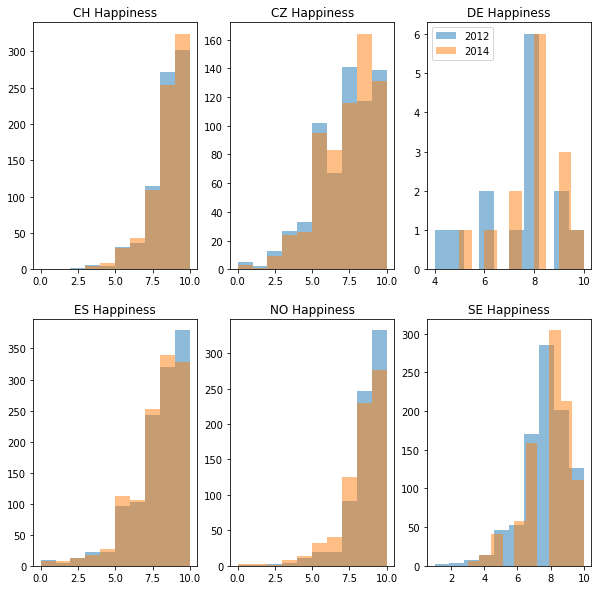

In [9]:
plt.subplots(2, 3, figsize=(10,10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

figs = [ax1, ax2, ax3, ax4, ax5, ax6]

cntry = df["cntry"].unique()

for f, c in zip(figs, cntry):
    f.hist(df[(df["cntry"] == c) & (df["year"] == 6)]["happy"].dropna(), alpha=.5, label="2012")
    f.hist(df[(df["cntry"] == c) & (df["year"] == 7)]["happy"].dropna(), alpha=.5, label="2014")
    f.set_title(c + " Happiness")

ax3.legend()

In [10]:
### because all the variables seem non-normally distributed, I will use the Wilcoxon-signed rank test
print("Comparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[0])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 7)]["happy"]))

print("\nComparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[1])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 7)]["ppltrst"]))

print("\nComparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[2])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 7)]["happy"]))

print("\nComparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[3])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 7)]["happy"]))

print("\nComparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[4])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 7)]["happy"]))

print("\nComparing 2012/2014 Levels of Happiness in ", df["cntry"].unique()[5])
print(stats.wilcoxon(df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 6)]["happy"], 
               df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 7)]["happy"]))

Comparing 2012/2014 Levels of Happiness in  CH
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Comparing 2012/2014 Levels of Happiness in  CZ
WilcoxonResult(statistic=22505.0, pvalue=5.216939284793514e-57)

Comparing 2012/2014 Levels of Happiness in  DE
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

Comparing 2012/2014 Levels of Happiness in  ES
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Comparing 2012/2014 Levels of Happiness in  NO
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Comparing 2012/2014 Levels of Happiness in  SE
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [11]:
import statistics
print("Czech Republic's average happiness in 2012:", statistics.mean(df[(df["cntry"] == "CZ") & (df["year"] == 6)]["happy"].dropna()))
print("Czech Republic's average happiness in 2014:", statistics.mean(df[(df["cntry"] == "CZ") & (df["year"] == 7)]["happy"].dropna()))
print("\nNorway's average happiness in 2012:", statistics.mean(df[(df["cntry"] == "NO") & (df["year"] == 6)]["happy"].dropna()))
print("Norway's average happiness in 2014:", statistics.mean(df[(df["cntry"] == "NO") & (df["year"] == 7)]["happy"].dropna()))


Czech Republic's average happiness in 2012: 6.7708978328173375
Czech Republic's average happiness in 2014: 6.914110429447852

Norway's average happiness in 2012: 8.25171939477304
Norway's average happiness in 2014: 7.9151846785225715


### 3. Who reported watching more TV in 2012, men or women?

Women reported watching slightly more TV in 2012. The numbers are very close, and according to the Mann-Whiteney rank test, the difference was not statistically significant.

Text(0.5,1,'TV Watching in 2012')

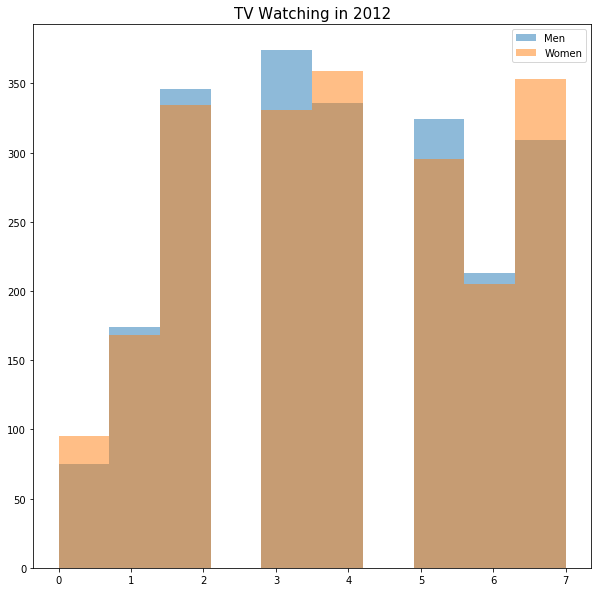

In [12]:
plt.figure(figsize=(10,10))
plt.hist(df[(df["gndr"] == 1.0) & (df["year"] == 6)]["tvtot"].dropna(), label="Men", alpha=.5)
plt.hist(df[(df["gndr"] == 2.0) & (df["year"] == 6)]["tvtot"].dropna(), label="Women", alpha=.5)
plt.legend()
plt.title("TV Watching in 2012", size=15)

In [13]:
### because the variable seems non-normally distributed, I will use the Mann-Whitney rank test
print("Comparing 2012 TV totals between men and women.")
print(stats.mannwhitneyu(df[(df["gndr"] == 1.0) & (df["year"] == 6)]["tvtot"], 
               df[(df["gndr"] == 2.0) & (df["year"] == 6)]["tvtot"]))


Comparing 2012 TV totals between men and women.
MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)


### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

People living with a partner were more likely to believe that people were fair in 2012. According to the t-test for independent samples, the difference was statistically significant.

Text(0.5,1,'The Amount People Believe That Others Are Fair in 2012')

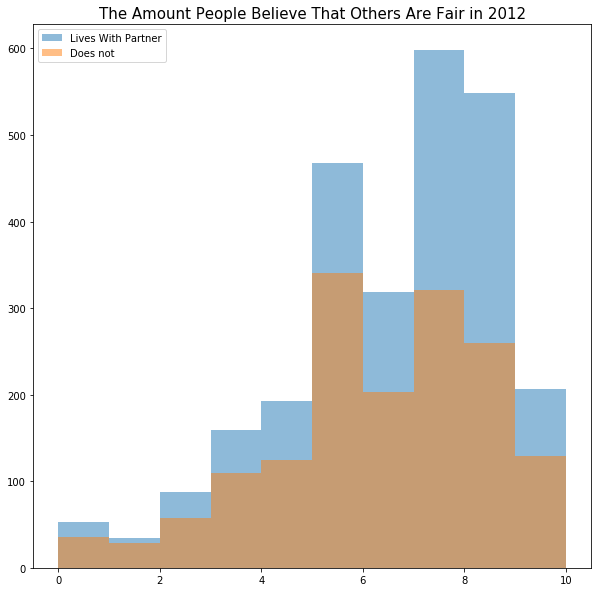

In [14]:
plt.figure(figsize=(10,10))
plt.hist(df[(df["partner"] == 1.0) & (df["year"] == 6)]["pplfair"].dropna(), label="Lives With Partner", alpha=.5)
plt.hist(df[(df["partner"] == 2.0) & (df["year"] == 6)]["pplfair"].dropna(), label="Does not", alpha=.5)
plt.legend()
plt.title("The Amount People Believe That Others Are Fair in 2012", size=15)

In [15]:
### because the variable seems normally distributed, I will use the t-test for independent samples
print("Comparing 2012 Fairness between men and women.")
print(stats.ttest_ind(df[(df["partner"] == 1.0) & (df["year"] == 6)]["pplfair"].dropna(), 
               df[(df["partner"] == 2.0) & (df["year"] == 6)]["pplfair"].dropna()))


Comparing 2012 Fairness between men and women.
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


In [16]:
print("People living with partner's average belief that others are fair in 2012:", statistics.mean(df[(df["partner"] == 1.0) & (df["year"] == 6)]["pplfair"].dropna()))
print("People living alone's average belief that others are fair in 2012:", statistics.mean(df[(df["partner"] == 2.0) & (df["year"] == 6)]["pplfair"].dropna()))

People living with partner's average belief that others are fair in 2012: 6.080736012016523
People living alone's average belief that others are fair in 2012: 5.856965174129353


### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Norway's data stood out among the the four countries I chose (which also included Switzerland, Czech Republic, and Germany. Through Mood's median test, it was clear that at least one of the groups had a different median. When I plotted boxplots, Norway's median was 6, while the median of the other countries was 5.


Text(0.5,1,'How Frequently People Meet Socially in 2014')

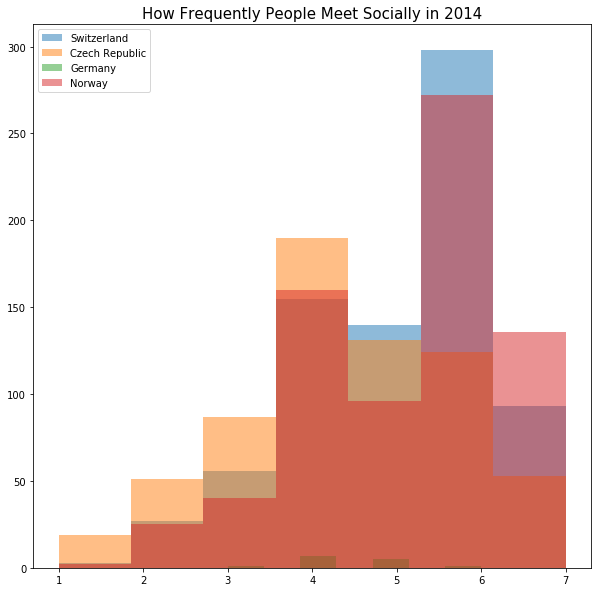

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df[(df["cntry"] == "CH") & (df["year"] == 7)]["sclmeet"].dropna(), label="Switzerland", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclmeet"].dropna(), label="Czech Republic", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclmeet"].dropna(), label="Germany", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclmeet"].dropna(), label="Norway", alpha=.5, bins=7)
plt.legend()
plt.title("How Frequently People Meet Socially in 2014", size=15)

In [18]:
### because all the variables seem non-normally distributed (although it's a close call), I will use Mood's median test
print("Comparing 2014 Frequency of Social Meetings Between Countries")
stats.median_test(df[(df["cntry"] == "CH") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclmeet"].dropna())

#The p-value shows that at least one group differs to a statistically significant degree.

Comparing 2014 Frequency of Social Meetings Between Countries


(138.13232916489267, 9.553096417132724e-30, 5.0, array([[391, 177,   1, 408],
        [381, 478,  13, 323]], dtype=int64))

In [19]:
CH_df = pd.DataFrame(df[df["cntry"] == "CH"]["sclmeet"])
CZ_df = pd.DataFrame(df[df["cntry"] == "CZ"]["sclmeet"])
DE_df = pd.DataFrame(df[df["cntry"] == "DE"]["sclmeet"])
NO_df = pd.DataFrame(df[df["cntry"] == "NO"]["sclmeet"])



In [37]:
CH_df.head()

,sclmeet
0,5.0
1,3.0
2,6.0
3,6.0
4,7.0


In [43]:
statistics.mean(CH_df.iloc[:, 0].dropna())

5.120622568093385

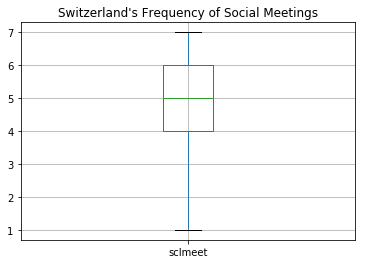

Median:  5.0
Average:  5.120622568093385


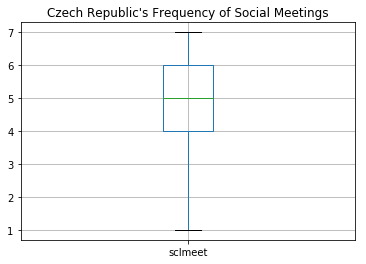

Median:  5.0
Average:  4.5473282442748095


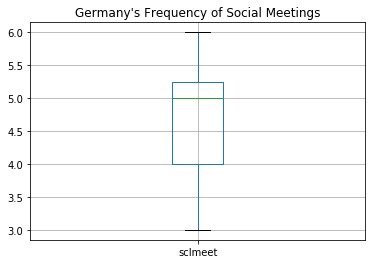

Median:  5.0
Average:  4.714285714285714


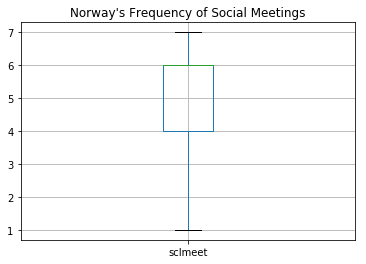

Median:  6.0
Average:  5.416552667578659


In [47]:
CH_df.dropna().boxplot()
plt.title("Switzerland's Frequency of Social Meetings")
plt.show()
print("Median: ", statistics.median(CH_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(CH_df.iloc[:, 0].dropna()))

CZ_df.dropna().boxplot()
plt.title("Czech Republic's Frequency of Social Meetings")
plt.show()
print("Median: ", statistics.median(CZ_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(CZ_df.iloc[:, 0].dropna()))

DE_df.dropna().boxplot()
plt.title("Germany's Frequency of Social Meetings")
plt.show()
print("Median: ", statistics.median(DE_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(DE_df.iloc[:, 0].dropna()))

NO_df.dropna().boxplot()
plt.title("Norway's Frequency of Social Meetings")
plt.show()
print("Median: ", statistics.median(NO_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(NO_df.iloc[:, 0].dropna()))

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? 

Using the 1-way ANOVA, it was clear that at least one group was statistically significantly different from the others. Upon plotting barplots, all four countries had the same mean score (4), but Norway's mean was slightly higher than those of the other countries. When I used a t-test for independent groups to compare every set, Germany, Switzerland, and the Czech Republic got p-values that showed they were not statistically significantly different from each other, while Norway stood out.

Text(0.5,1,'Social Activities Relative to Others Their Age in 2014')

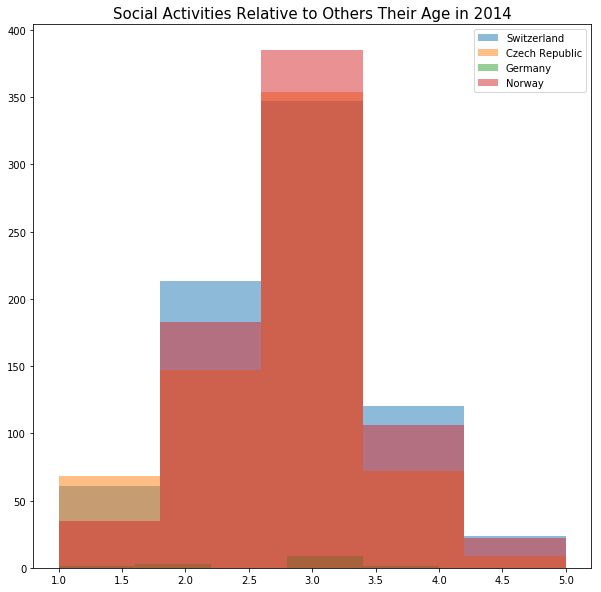

In [50]:
plt.figure(figsize=(10,10))
plt.hist(df[(df["cntry"] == "CH") & (df["year"] == 7)]["sclact"].dropna(), label="Switzerland", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclact"].dropna(), label="Czech Republic", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclact"].dropna(), label="Germany", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclact"].dropna(), label="Norway", alpha=.5, bins=5)
plt.legend()
plt.title("Social Activities Relative to Others Their Age in 2014", size=15)

In [51]:
### because all the variables seem normally distributed, I will use the 1-way ANOVA
print("Comparing 2014 Social Activities Relative to Age Group Between Countries")
stats.f_oneway(df[(df["cntry"] == "CH") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclact"].dropna())

#The p-value shows that at least one group differs to a statistically significant degree.

Comparing 2014 Social Activities Relative to Age Group Between Countries


F_onewayResult(statistic=3.759335588707546, pvalue=0.010442184751832385)

In [52]:
CH_df = pd.DataFrame(df[df["cntry"] == "CH"]["sclact"])
CZ_df = pd.DataFrame(df[df["cntry"] == "CZ"]["sclact"])
DE_df = pd.DataFrame(df[df["cntry"] == "DE"]["sclact"])
NO_df = pd.DataFrame(df[df["cntry"] == "NO"]["sclact"])



In [53]:
CH_df.head()

,sclact
0,4.0
1,2.0
2,3.0
3,2.0
4,2.0


In [54]:
statistics.mean(CH_df.iloc[:, 0].dropna())

2.7432874918140144

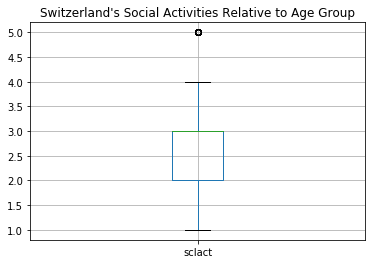

Median:  3.0
Average:  2.7432874918140144


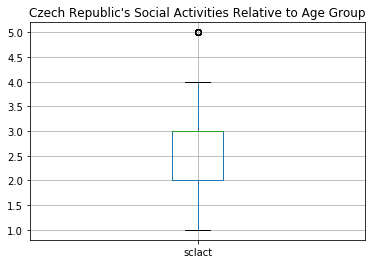

Median:  3.0
Average:  2.6584234930448223


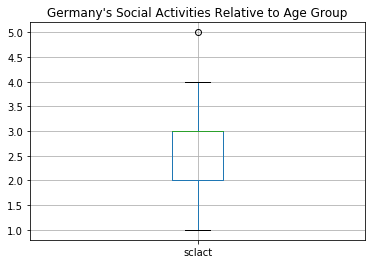

Median:  3.0
Average:  2.7857142857142856


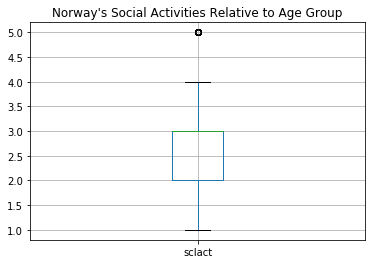

Median:  3.0
Average:  2.9121482498284146


In [55]:
CH_df.dropna().boxplot()
plt.title("Switzerland's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(CH_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(CH_df.iloc[:, 0].dropna()))

CZ_df.dropna().boxplot()
plt.title("Czech Republic's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(CZ_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(CZ_df.iloc[:, 0].dropna()))

DE_df.dropna().boxplot()
plt.title("Germany's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(DE_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(DE_df.iloc[:, 0].dropna()))

NO_df.dropna().boxplot()
plt.title("Norway's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(NO_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(NO_df.iloc[:, 0].dropna()))

In [57]:
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), CZ_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), DE_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CZ_df.iloc[:, 0].dropna(), DE_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CZ_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(DE_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))


Ttest_indResult(statistic=2.5071032885362734, pvalue=0.012228348905907594)
Ttest_indResult(statistic=-0.24836237100629618, pvalue=0.8038868818116531)
Ttest_indResult(statistic=-5.437603333556945, pvalue=5.836411312905429e-08)
Ttest_indResult(statistic=-0.7444326939650638, pvalue=0.4567472498681746)
Ttest_indResult(statistic=-7.874845421691988, pvalue=4.868694703114544e-15)
Ttest_indResult(statistic=-0.8326042193227222, pvalue=0.4052020378662107)
